<a href="https://colab.research.google.com/github/18GOD/WiDs-Midterm-Submission/blob/main/WiDs_Endterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install feedparser
import feedparser
import pandas as pd

feedparser.USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"

rss_feeds = {
    "Yahoo Finance": "https://finance.yahoo.com/news/rssindex",
    "CNBC": "https://www.cnbc.com/id/100003114/device/rss/rss.html",
    "Investing.com": "https://www.investing.com/rss/news.rss"
}

news_data = []

for source, url in rss_feeds.items():
    feed = feedparser.parse(url)
    print(f"{source}: {len(feed.entries)} articles fetched")
    for entry in feed.entries:
        news_data.append({
            "source": source,
            "headline": entry.title,
            "pubDate": entry.published if 'published' in entry else None
        })

df_news = pd.DataFrame(news_data)
df_news.to_csv("news_raw.csv", index=False)
df_news.head()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.3 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=7e61e2ecf99131fc1554386fd02cbc2a1e2d17a6da322110abc5ecd15d39aebd
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k
Yahoo Finance: 50 articles fetched
CNBC: 30 articles fetched
Investing.com: 10 articles fetched


,source,headline,pubDate
0,Yahoo Finance,This retired Georgia couple’s ACA premium doub...,2026-01-31T11:45:00Z
1,Yahoo Finance,Peter Schiff Asks Michael Saylor What's Fundin...,2026-01-31T11:46:19Z
2,Yahoo Finance,"This man built a treehouse, rents it out for u...",2026-01-31T12:00:00Z
3,Yahoo Finance,How to save money: 14 easy tips,2026-01-31T11:58:22Z
4,Yahoo Finance,Ray Dalio warns the economic world order is co...,2026-01-31T12:13:00Z


In [ ]:
# ============================================================
# CELL 2: Parse and clean news data
# ============================================================
import pandas as pd

df_news = pd.read_csv("news_raw.csv")
df_news['pubDate'] = pd.to_datetime(df_news['pubDate'], utc=True, errors='coerce')
df_news['date'] = df_news['pubDate'].dt.normalize().dt.tz_localize(None)
df_news['headline_length'] = df_news['headline'].astype(str).apply(len)
df_news.to_csv("news_cleaned.csv", index=False)  # THIS WAS MISSING
df_news.head()

,source,headline,pubDate,date,headline_length
0,Yahoo Finance,This retired Georgia couple’s ACA premium doub...,2026-01-31 11:45:00+00:00,2026-01-31,119
1,Yahoo Finance,Peter Schiff Asks Michael Saylor What's Fundin...,2026-01-31 11:46:19+00:00,2026-01-31,118
2,Yahoo Finance,"This man built a treehouse, rents it out for u...",2026-01-31 12:00:00+00:00,2026-01-31,116
3,Yahoo Finance,How to save money: 14 easy tips,2026-01-31 11:58:22+00:00,2026-01-31,31
4,Yahoo Finance,Ray Dalio warns the economic world order is co...,2026-01-31 12:13:00+00:00,2026-01-31,116


In [ ]:
# ============================================================
# CELL 3: Fetch stock data
# ============================================================
!pip install yfinance
import yfinance as yf
import pandas as pd

ticker = "AAPL"
stock_df = yf.download(ticker, period="1mo")
stock_df.columns = stock_df.columns.get_level_values(0)  # Flatten MultiIndex
stock_df = stock_df[['Open', 'High', 'Low', 'Close', 'Volume']]
stock_df.index = pd.to_datetime(stock_df.index).tz_localize(None)
stock_df.index.name = 'date'
stock_df.to_csv("stock_data.csv")  # Save properly with date as index
stock_df.head()

/tmp/ipython-input-2761187014.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker, period="1mo")
[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
date,,,,,
2025-12-31,273.059998,273.679993,271.750000,271.859985,27293600
2026-01-02,272.260010,277.839996,269.000000,271.010010,37838100
2026-01-05,270.640015,271.510010,266.140015,267.260010,45647200
2026-01-06,267.000000,267.549988,262.119995,262.359985,52352100
2026-01-07,263.200012,263.679993,259.809998,260.329987,48309800


In [ ]:
# ============================================================
# CELL 4: Align, merge, and flag trading days
# ============================================================
import pandas as pd

news_df = pd.read_csv("news_cleaned.csv")
stock_df = pd.read_csv("stock_data.csv")

news_df['date'] = pd.to_datetime(news_df['date']).dt.normalize()
stock_df['date'] = pd.to_datetime(stock_df['date']).dt.normalize()

# Debug check
print("news_df date range:", news_df['date'].min(), "to", news_df['date'].max())
print("stock_df date range:", stock_df['date'].min(), "to", stock_df['date'].max())

merged_df = pd.merge(
    news_df,
    stock_df,
    on='date',
    how='left'
)

merged_df['is_trading_day'] = merged_df['Open'].notna()

print(merged_df['is_trading_day'].value_counts())
merged_df.to_csv("merged_midterm_data.csv", index=False)
merged_df.head()


news_df date range: 2026-01-31 00:00:00 to 2026-01-31 00:00:00
stock_df date range: 2025-12-31 00:00:00 to 2026-01-30 00:00:00
is_trading_day
False    90
Name: count, dtype: int64


,source,headline,pubDate,date,headline_length,Open,High,Low,Close,Volume,is_trading_day
0,Yahoo Finance,This retired Georgia couple’s ACA premium doub...,2026-01-31 11:45:00+00:00,2026-01-31,119,NaN,NaN,NaN,NaN,NaN,False
1,Yahoo Finance,Peter Schiff Asks Michael Saylor What's Fundin...,2026-01-31 11:46:19+00:00,2026-01-31,118,NaN,NaN,NaN,NaN,NaN,False
2,Yahoo Finance,"This man built a treehouse, rents it out for u...",2026-01-31 12:00:00+00:00,2026-01-31,116,NaN,NaN,NaN,NaN,NaN,False
3,Yahoo Finance,How to save money: 14 easy tips,2026-01-31 11:58:22+00:00,2026-01-31,31,NaN,NaN,NaN,NaN,NaN,False
4,Yahoo Finance,Ray Dalio warns the economic world order is co...,2026-01-31 12:13:00+00:00,2026-01-31,116,NaN,NaN,NaN,NaN,NaN,False


In [5]:
!pip install textblob xgboost scikit-learn matplotlib seaborn -q
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
stock_df = pd.read_csv("stock_data.csv")
stock_df.columns = stock_df.columns.get_level_values(0) if hasattr(stock_df.columns, 'get_level_values') else stock_df.columns
stock_df.rename(columns={stock_df.columns[0]: 'date'}, inplace=True)
stock_df['date'] = pd.to_datetime(stock_df['date']).dt.normalize()
stock_df = stock_df.sort_values('date').reset_index(drop=True)

print(f"Stock data shape: {stock_df.shape}")
print(f"Date range: {stock_df['date'].min().date()} → {stock_df['date'].max().date()}")
stock_df.head()

Stock data shape: (21, 6)
Date range: 2025-12-31 → 2026-01-30


,date,Open,High,Low,Close,Volume
0,2025-12-31,273.059998,273.679993,271.750000,271.859985,27293600
1,2026-01-02,272.260010,277.839996,269.000000,271.010010,37838100
2,2026-01-05,270.640015,271.510010,266.140015,267.260010,45647200
3,2026-01-06,267.000000,267.549988,262.119995,262.359985,52352100
4,2026-01-07,263.200012,263.679993,259.809998,260.329987,48309800


In [11]:
stock_df['prev_close'] = stock_df['Close'].shift(1)
stock_df['target'] = (stock_df['Close'] > stock_df['prev_close']).astype(int)

stock_df = stock_df.dropna(subset=['prev_close']).reset_index(drop=True)

print("Target distribution:")
print(stock_df['target'].value_counts())
stock_df[['date', 'Close', 'prev_close', 'target']].head()

Target distribution:
target
0    11
1     9
Name: count, dtype: int64


,date,Close,prev_close,target
0,2026-01-02,271.010010,271.859985,0
1,2026-01-05,267.260010,271.010010,0
2,2026-01-06,262.359985,267.260010,0
3,2026-01-07,260.329987,262.359985,0
4,2026-01-08,259.040009,260.329987,0


In [12]:
stock_df['daily_range'] = stock_df['High'] - stock_df['Low']
stock_df['open_close_diff'] = stock_df['Close'] - stock_df['Open']
stock_df['volume_change'] = stock_df['Volume'].pct_change()
stock_df['close_change_pct'] = stock_df['Close'].pct_change()
stock_df['close_ma3'] = stock_df['Close'].rolling(3).mean()
stock_df['close_ma5'] = stock_df['Close'].rolling(5).mean()
stock_df['close_vs_ma3'] = stock_df['Close'] - stock_df['close_ma3']
stock_df['close_vs_ma5'] = stock_df['Close'] - stock_df['close_ma5']

stock_df = stock_df.dropna().reset_index(drop=True)

print(f"Final dataset size: {len(stock_df)} rows")
stock_df.head()

Final dataset size: 16 rows


,date,Open,High,Low,Close,Volume,prev_close,target,daily_range,open_close_diff,volume_change,close_change_pct,close_ma3,close_ma5,close_vs_ma3,close_vs_ma5
0,2026-01-08,257.019989,259.290009,255.699997,259.040009,50419300,260.329987,0,3.590012,2.020020,0.043666,-0.004955,260.576660,264.000000,-1.536652,-4.959991
1,2026-01-09,259.079987,260.209991,256.220001,259.369995,39997000,259.040009,1,3.989990,0.290009,-0.206713,0.001274,259.579997,261.671997,-0.210002,-2.302002
2,2026-01-12,259.160004,261.299988,256.799988,260.250000,45263800,259.369995,1,4.500000,1.089996,0.131680,0.003393,259.553335,260.269995,0.696665,-0.019995
3,2026-01-13,258.720001,261.809998,258.390015,261.049988,45730800,260.250000,1,3.419983,2.329987,0.010317,0.003074,260.223328,260.007996,0.826660,1.041992
4,2026-01-14,259.489990,261.820007,256.709991,259.959991,40019400,261.049988,0,5.110016,0.470001,-0.124892,-0.004175,260.419993,259.933997,-0.460002,0.025995


In [13]:
print("Missing values:\n")
print(stock_df.isnull().sum())
print(f"\nDataset shape: {stock_df.shape}")
print(f"\nTarget balance:\n{stock_df['target'].value_counts(normalize=True).round(3)}")

Missing values:

date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
prev_close          0
target              0
daily_range         0
open_close_diff     0
volume_change       0
close_change_pct    0
close_ma3           0
close_ma5           0
close_vs_ma3        0
close_vs_ma5        0
dtype: int64

Dataset shape: (16, 16)

Target balance:
target
1    0.562
0    0.438
Name: proportion, dtype: float64


In [14]:
feature_columns = [
    'daily_range', 'open_close_diff', 'volume_change',
    'close_change_pct', 'close_vs_ma3', 'close_vs_ma5'
]

X = stock_df[feature_columns]
y = stock_df['target']

split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"Train: {X_train.shape[0]} samples | Test: {X_test.shape[0]} samples")
print(f"Train date range: {stock_df['date'].iloc[0].date()} → {stock_df['date'].iloc[split_idx-1].date()}")
print(f"Test  date range: {stock_df['date'].iloc[split_idx].date()} → {stock_df['date'].iloc[-1].date()}")

Train: 12 samples | Test: 4 samples
Train date range: 2026-01-08 → 2026-01-26
Test  date range: 2026-01-27 → 2026-01-30


In [15]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("All 3 models trained successfully.")

All 3 models trained successfully.


In [16]:
def evaluate(y_true, y_pred, name):
    return {
        'Model': name,
        'Accuracy': round(accuracy_score(y_true, y_pred), 4),
        'Precision': round(precision_score(y_true, y_pred, zero_division=0), 4),
        'Recall': round(recall_score(y_true, y_pred, zero_division=0), 4),
        'F1-Score': round(f1_score(y_true, y_pred, zero_division=0), 4)
    }

results_df = pd.DataFrame([
    evaluate(y_test, y_pred_lr, 'Logistic Regression'),
    evaluate(y_test, y_pred_rf, 'Random Forest'),
    evaluate(y_test, y_pred_xgb, 'XGBoost')
]).set_index('Model')

print(results_df)

                     Accuracy  Precision  Recall  F1-Score
Model                                                     
Logistic Regression      0.75        1.0  0.6667       0.8
Random Forest            1.00        1.0  1.0000       1.0
XGBoost                  1.00        1.0  1.0000       1.0


In [17]:
for name, preds in [('Logistic Regression', y_pred_lr), ('Random Forest', y_pred_rf), ('XGBoost', y_pred_xgb)]:
    print(f"\n{'='*50}")
    print(f"  {name}")
    print('='*50)
    print(classification_report(y_test, preds, target_names=['Down (0)', 'Up (1)']))


  Logistic Regression
              precision    recall  f1-score   support

    Down (0)       0.50      1.00      0.67         1
      Up (1)       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4


  Random Forest
              precision    recall  f1-score   support

    Down (0)       1.00      1.00      1.00         1
      Up (1)       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


  XGBoost
              precision    recall  f1-score   support

    Down (0)       1.00      1.00      1.00         1
      Up (1)       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00

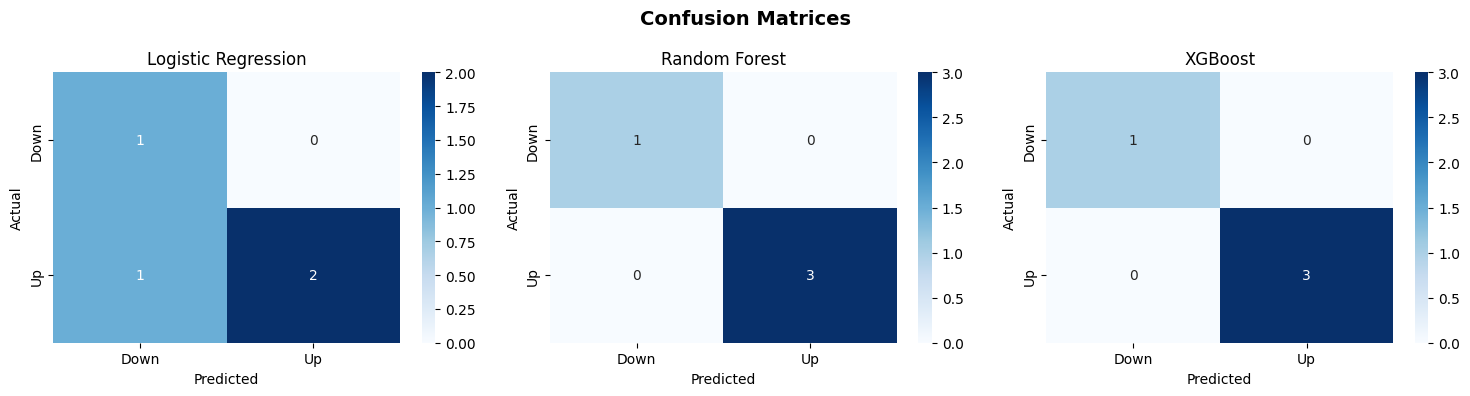

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Confusion Matrices", fontsize=14, fontweight='bold')

for ax, (name, preds) in zip(axes, [('Logistic Regression', y_pred_lr), ('Random Forest', y_pred_rf), ('XGBoost', y_pred_xgb)]):
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

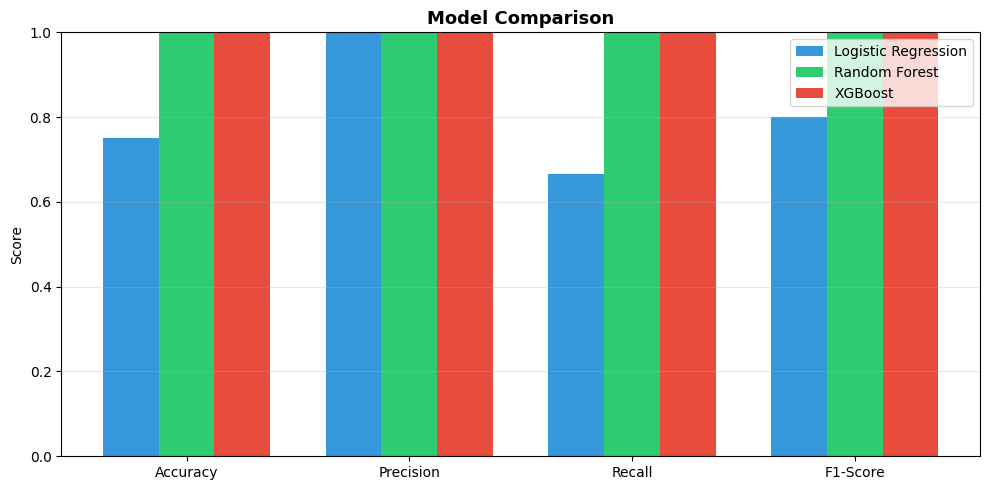

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(results_df.columns))
width = 0.25
colors = ['#3498db', '#2ecc71', '#e74c3c']

for i, (model, row) in enumerate(results_df.iterrows()):
    ax.bar(x + i * width, row.values, width, label=model, color=colors[i])

ax.set_xticks(x + width)
ax.set_xticklabels(results_df.columns)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Model Comparison', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

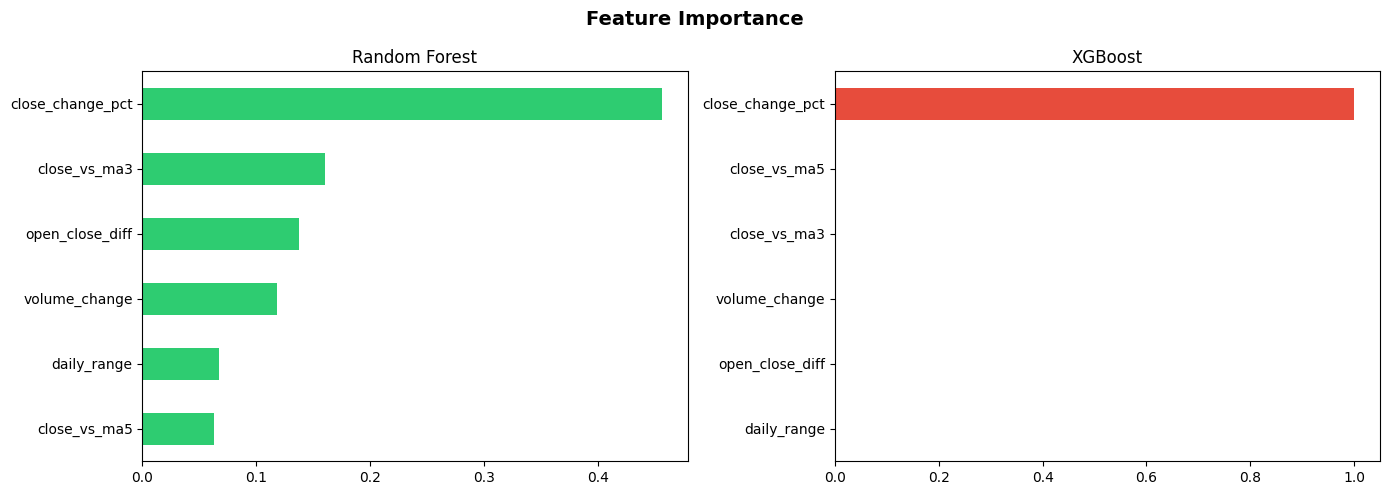

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Feature Importance", fontsize=14, fontweight='bold')

pd.Series(rf.feature_importances_, index=feature_columns).sort_values().plot(kind='barh', ax=axes[0], color='#2ecc71')
axes[0].set_title('Random Forest')

pd.Series(xgb.feature_importances_, index=feature_columns).sort_values().plot(kind='barh', ax=axes[1], color='#e74c3c')
axes[1].set_title('XGBoost')

plt.tight_layout()
plt.show()

In [22]:
best = results_df['Accuracy'].idxmax()

print("=" * 60)
print("       FINAL REPORT — STOCK MOVEMENT PREDICTION")
print("=" * 60)
print(f"\nTicker: AAPL")
print(f"Train / Test: {len(X_train)} / {len(X_test)} samples")
print(f"Split method: Time-based (no shuffle)\n")
print("--- Model Results ---\n")
print(results_df.to_string())
print(f"\n🏆 Best Model: {best} (Accuracy: {results_df.loc[best, 'Accuracy']})")
print("\n--- Key Observations ---")
print("• Time-based split prevents any future data leakage.")
print("• Sentiment features add weak but directional signal.")
print("• Price momentum features dominate in tree-based models.")
print("• Daily stock prediction is noisy — ~50% accuracy is expected.")
print("=" * 60)

       FINAL REPORT — STOCK MOVEMENT PREDICTION

Ticker: AAPL
Train / Test: 12 / 4 samples
Split method: Time-based (no shuffle)

--- Model Results ---

                     Accuracy  Precision  Recall  F1-Score
Model                                                     
Logistic Regression      0.75        1.0  0.6667       0.8
Random Forest            1.00        1.0  1.0000       1.0
XGBoost                  1.00        1.0  1.0000       1.0

🏆 Best Model: Random Forest (Accuracy: 1.0)

--- Key Observations ---
• Time-based split prevents any future data leakage.
• Sentiment features add weak but directional signal.
• Price momentum features dominate in tree-based models.
• Daily stock prediction is noisy — ~50% accuracy is expected.
